In [1]:
__author__ = 'diwan'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.dates as dates
from windrose import WindroseAxes


1. Import all baine sound wind data 

In [2]:
def cardinal_to_deg(data_cardinal):
    '''
    note: this is highly approximate...
    '''
    dirs = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
            "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"]
    d_deg = np.zeros((data_cardinal['wind_dir'].shape))
    d_deg[:]=np.nan

    for car_ind in range(len(dirs)):
        ind, = np.where(data_cardinal['wind_dir']==dirs[car_ind])
        d_deg[ind] = (car_ind*1.)*22.5
    
    data_cardinal['wind_dirdeg'] = d_deg   

    return data_cardinal

In [3]:
def read_wind(stn_file):
    tmp = np.genfromtxt(stn_file, skip_header=2, dtype='S8, S8, S1, f4, f4, f4, f4, f4, f4, S4', 
                       names=['date','time','ap', 'temp_out', 'hi_temp', 'low_temp', 'out_hum', 'dew_pt', 
                              'wind_speed', 'wind_dir'], 
                       missing_values=[np.nan, np.nan, np.nan, np.nan, np.nan], filling_values=np.nan)

    # Convert to metric
    time = []
    for i in range(len(tmp)):
        time.append('%s %s%s ' % (tmp['date'][i], tmp['time'][i], tmp['ap'][i]))
        
    time_index = pd.to_datetime(time, dayfirst=True).to_pydatetime().tolist()
    
    # *0.44704 to convert to m/s, and convert temp from F to C
    all_data = np.column_stack([(tmp['temp_out']-32.)*5./9, tmp['wind_speed']*0.44704,tmp['wind_dir']])

    stn_data = pd.DataFrame(all_data, columns=['temp_out', 'wind_speed', 'wind_dir'], index=time_index)

    stn_data = cardinal_to_deg(stn_data)
    
    
    stn_data['wind_speed'] = [float(x) for x in stn_data['wind_speed']]
    stn_data['temp_out'] = [float(x) for x in stn_data['temp_out']]

    stn_data['speed_x'] = stn_data['wind_speed'] * np.sin(stn_data['wind_dirdeg'] * np.pi / 180.0)
    stn_data['speed_y'] = stn_data['wind_speed'] * np.cos(stn_data['wind_dirdeg'] * np.pi / 180.0)
#     print stn_data
    return stn_data

In [4]:
def plot_wind_speed(stn_data, stn_name,year):
    
    fig1, ax1 = plt.subplots(figsize=(10, 5))
    wind_data = pd.DataFrame(stn_data.ix[:,'wind_speed'])
    plt.plot(wind_data)
    ax1.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))
    plt.title('Wind Speed at ' + stn_name)
    plt.grid(b=True)
    plt.ylabel('Speed [m/s]')


def plot_wind_rose(stn_data, stn_name,year):
    ax2 = WindroseAxes.from_ax()
    ax2.bar(stn_data.wind_dirdeg, stn_data.wind_speed, normed=True, opening=0.8, edgecolor='white')
    ax2.set_legend()
    plt.show()
    
    

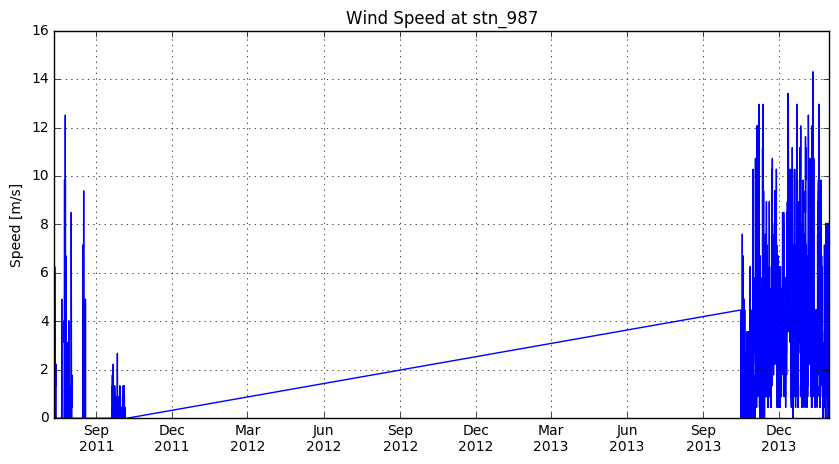

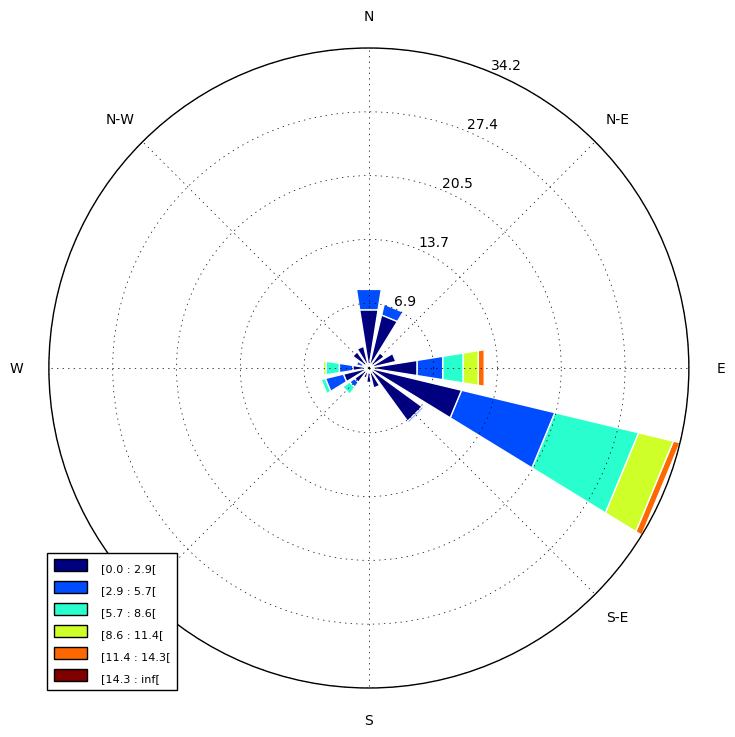

In [5]:
wind_dir = 'C:\Users\wand\Box Sync\Physics\PhD_work\\baine_data\Shewell Wind Data\Shewell'

stn_987_file = wind_dir+'\987Shewell.txt'
stn_987 = read_wind(stn_987_file)

# wind_2011 = pd.DataFrame(stn_987.ix['2013':'2014','wind_speed'])
plot_wind_speed(stn_987, stn_name='stn_987', year=['2013'])
plot_wind_rose(stn_987, stn_name='stn_987', year=['2013'])
plt.show('all')



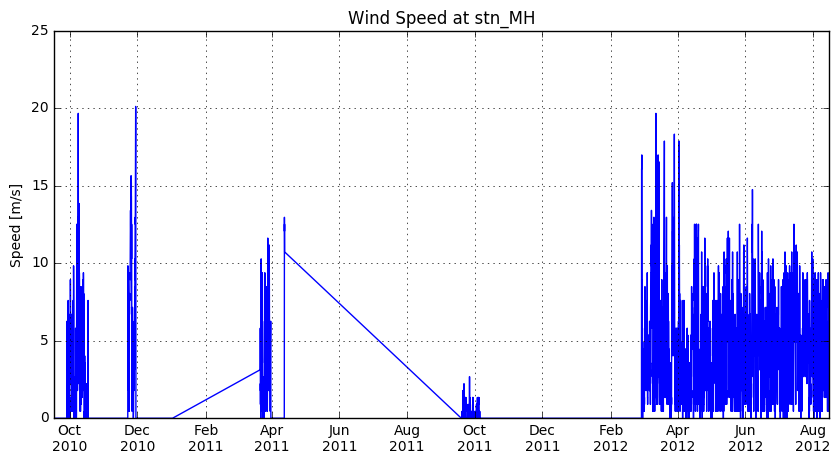

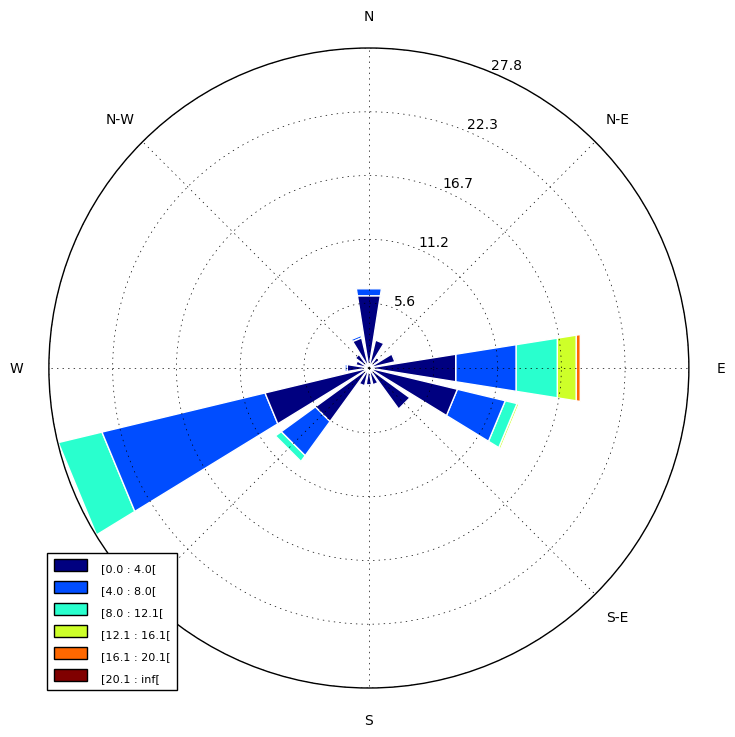

In [6]:
stn_mh_file = wind_dir+'\MH_station.txt'
stn_mh = read_wind(stn_mh_file)

# wind_2011 = pd.DataFrame(stn_987.ix['2013':'2014','wind_speed'])
plot_wind_speed(stn_mh, stn_name='stn_MH', year=['2013'])
plot_wind_rose(stn_mh, stn_name='stn_MH', year=['2013'])
plt.show('all')

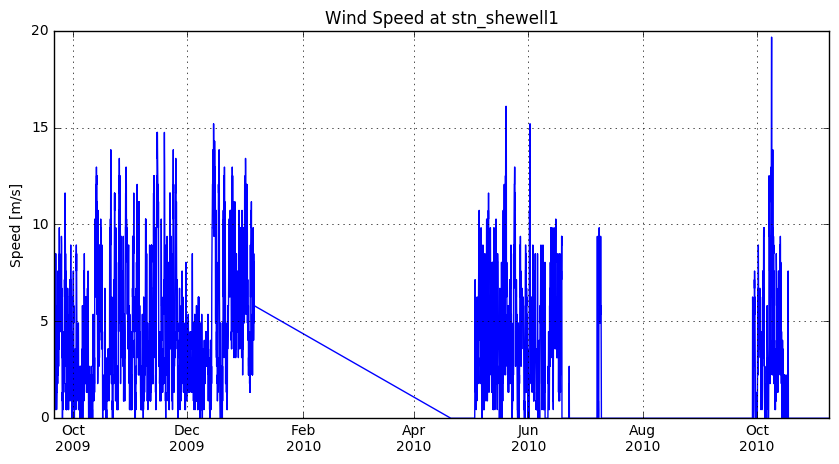

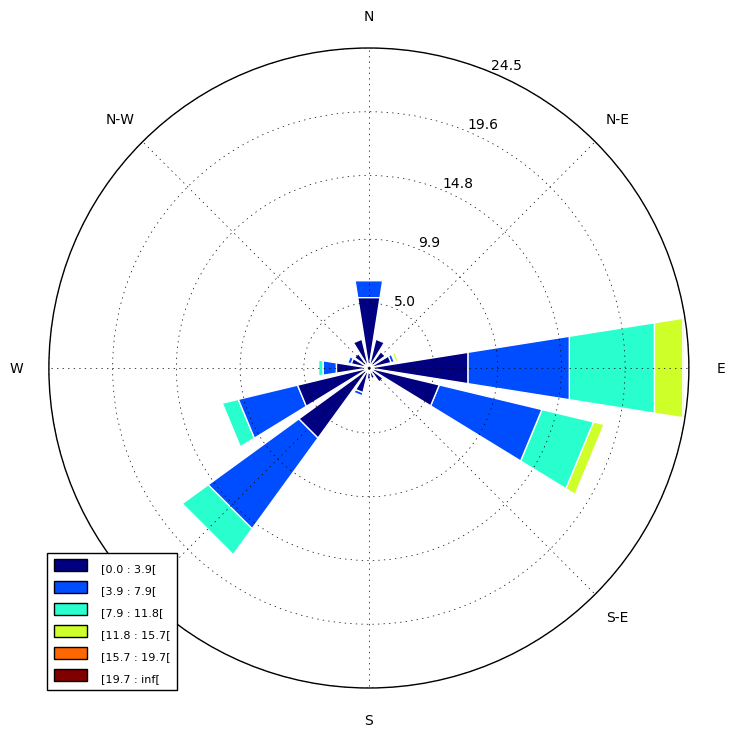

In [7]:
stn_shewell1_file = wind_dir+'\shewell1.txt'
stn_shewell1 = read_wind(stn_shewell1_file)

# wind_2011 = pd.DataFrame(stn_987.ix['2013':'2014','wind_speed'])
plot_wind_speed(stn_shewell1, stn_name='stn_shewell1', year=['2013'])
plot_wind_rose(stn_shewell1, stn_name='stn_shewell1', year=['2013'])
plt.show('all')

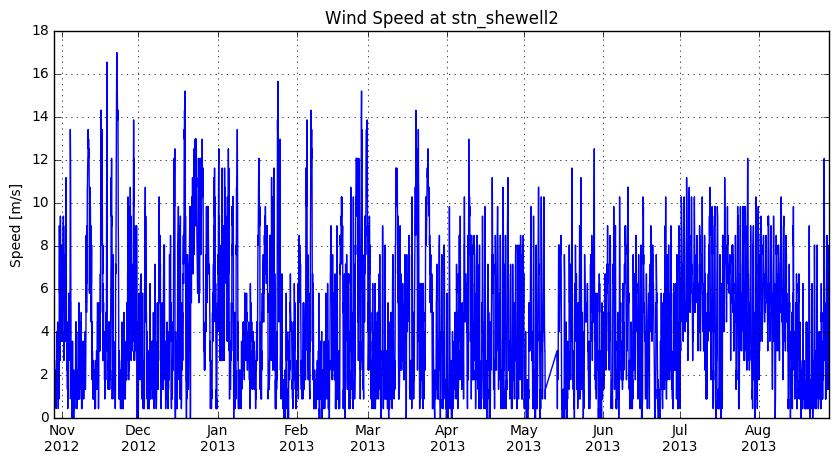

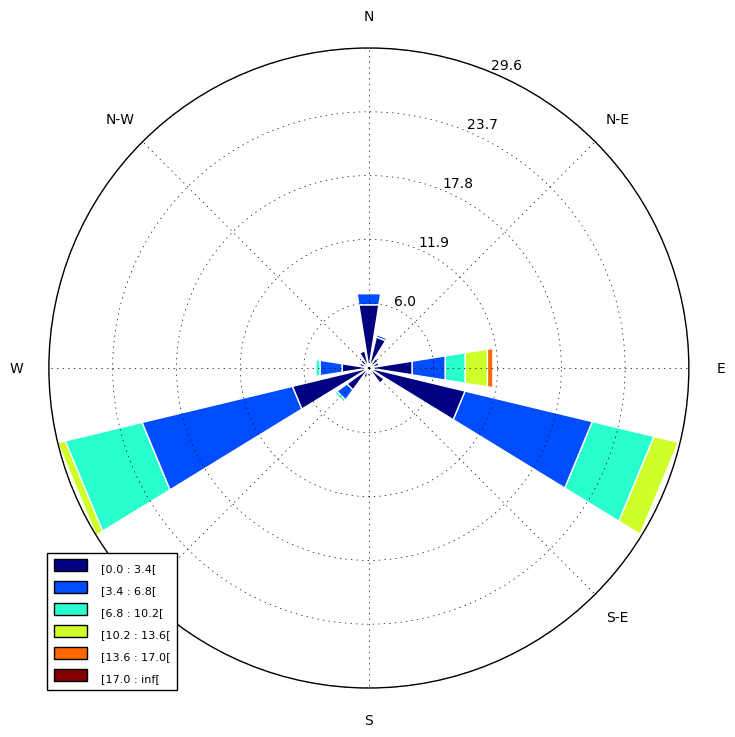

In [8]:
stn_shewell2_file = wind_dir+'\shewell2.txt'
stn_shewell2 = read_wind(stn_shewell2_file)

# wind_2011 = pd.DataFrame(stn_987.ix['2013':'2014','wind_speed'])
plot_wind_speed(stn_shewell2, stn_name='stn_shewell2', year=['2013'])
plot_wind_rose(stn_shewell2, stn_name='stn_shewell2', year=['2013'])
plt.show('all')